# Wordle Tweet Dataset


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import re
import scipy.stats as stats
import sklearn

Cominciamo importando il Dataset e visualizziamo alcune informazioni sulla tabella

In [2]:
wordle = pd.read_csv("WordleMegaData.csv")
wordle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140196 entries, 0 to 2140195
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   WordleID         int64  
 1   ID               int64  
 2   Created_At       object 
 3   Text             object 
 4   Source           object 
 5   UserID           float64
 6   Username         object 
 7   User_ScreenName  object 
 8   Location         object 
 9   Truncated        bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 149.0+ MB


Andiamo ora a visualizzare le prime occorrenze della tabella

In [3]:
wordle.head()

,WordleID,ID,Created_At,Text,Source,UserID,Username,User_ScreenName,Location,Truncated
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Wordle 254 3/6\n\n🟨🟨⬛⬛⬛\n🟨⬛🟨⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,3.681676e+07,Leslie Brown,live_laugh_pray,Haida Gwaii,False
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Wordle 254 4/6\n\n⬛⬛⬛⬛🟩\n⬛⬛⬛⬛🟩\n⬛🟩⬛⬛🟩\n🟩🟩🟩🟩🟩\n...,Twitter for iPhone,4.825910e+08,Dylan Sobo,DaBolt727,"Largo, FL / Bradenton|FGCU",False
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Wordle 254 3/6\n\n⬛⬛⬛⬛🟩\n⬛⬛🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.397624e+18,🖤,wengojos,23 • she/her • 🇵🇭🇺🇸,False
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Wordle 254 3/6\n\n⬛⬛⬛🟨⬛\n⬛🟨⬛⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.255905e+18,Dustin Waters,DustinWaters12,NaN,False
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Wordle 254 3/6\n\n⬛🟨⬛⬛⬛\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,2.528937e+08,R. Colin,rollin_fatty,"Richmond, VA",False


## Pulizia dei dati

Per ogni carattersitica andiamo a visualizzare il numero di elementi nulli.

In [4]:
wordle.isnull().sum()

WordleID                0
ID                      0
Created_At              0
Text                    0
Source                  0
UserID                  0
Username               89
User_ScreenName         0
Location           573361
Truncated               0
dtype: int64

La caratteristica 'ID' rappresenta l'ID del tweet e quindi deve essere unica. Verifichiamo che sia così.

In [5]:
num_unique_elements = wordle['ID'].nunique()
total_elements = len(wordle['ID'])

print("Number of rows where 'ID' is unique:", num_unique_elements)
print("Total number of rows:", total_elements)

Number of rows where 'ID' is unique: 2140187
Total number of rows: 2140196


Sono presenti dei duplicati, li eliminiamo.

In [6]:
wordle = wordle.drop_duplicates(subset=['ID'], keep=False)
wordle.shape

(2140178, 10)

Ora che le nostre occorrenze sono uniche, andiamo a effettuare una pulizia del testo, mantenendo solamente le informazioni riguardanti la partita a wordle. 
Inoltre dal testo generiamo una colonna "Attempts" che rappresenta il numero di tentativi effettuati per indovinare la parola o la X nel caso di fallimento.

In [7]:
number_pattern = re.compile(r'(Wordle) (\d{3}) (([1-6]|X)\/6)')

# Function to extract the number of attempts from each row
def extract_attempts(row):
    match = number_pattern.search(row)
    if match:
        return match.group(3).replace('/6', '') 
    else:
        return np.nan

# Create a new column with the extracted numbers
wordle['Attempts'] = wordle['Text'].apply(extract_attempts)

wordle.head()

,WordleID,ID,Created_At,Text,Source,UserID,Username,User_ScreenName,Location,Truncated,Attempts
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Wordle 254 3/6\n\n🟨🟨⬛⬛⬛\n🟨⬛🟨⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,3.681676e+07,Leslie Brown,live_laugh_pray,Haida Gwaii,False,3
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Wordle 254 4/6\n\n⬛⬛⬛⬛🟩\n⬛⬛⬛⬛🟩\n⬛🟩⬛⬛🟩\n🟩🟩🟩🟩🟩\n...,Twitter for iPhone,4.825910e+08,Dylan Sobo,DaBolt727,"Largo, FL / Bradenton|FGCU",False,4
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Wordle 254 3/6\n\n⬛⬛⬛⬛🟩\n⬛⬛🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.397624e+18,🖤,wengojos,23 • she/her • 🇵🇭🇺🇸,False,3
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Wordle 254 3/6\n\n⬛⬛⬛🟨⬛\n⬛🟨⬛⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.255905e+18,Dustin Waters,DustinWaters12,NaN,False,3
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Wordle 254 3/6\n\n⬛🟨⬛⬛⬛\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,2.528937e+08,R. Colin,rollin_fatty,"Richmond, VA",False,3


Per estrarre ulteriori informazioni possiamo affidarci alle emoji riportate nei tweet, vi sono una serie di rappresentazioni alternative per la stessa informazione. Inoltre possiamo fare una verifica incrociata con il numero di tentativi per verificare la coerenza delle informazioni.

Le informazioni per le varie emoji sono le seguenti:
- ⬛ o ⬜ indicano che la lettera non è presente nella parola
- 🟦 o 🟨 indicano che la lettera è corretta ma non la sua posizione
- 🟩 o 🟧 indicano che la lettera è corretta e anche la sua posizione

*Possiamo sfruttare questa informazione per fare ulteriori analisi e/o test statistici, come per esempio, in media quanta gente indovina dopo una certa quantità di quadratini gialli/blu?*

Eliminiamo le righe che contengono nella colonna Text più occorrenze di una partita perchè ambigue. Quale delle partite nel tweet è stata effettivamente giocata? Quale corrisponde alla partita di oggi? 

In [8]:
colored_squares_pattern = re.compile(r'(\n[🟨🟩⬛⬜]{5})', flags=re.UNICODE)

# Function to extract emojis from a text
#def filter_text(row):
    #matches = colored_squares_pattern.findall(row['Text'])
    #if not matches:
        #return np.nan  # Label as NaN if no match found
    #filtered_text = '-'.join(''.join(element for element in match) for match in matches)
    #return filtered_text

def filter_text(row):
    matches = colored_squares_pattern.findall(row['Text'])
    if not matches:
        return np.nan  # Label as NaN if no match found
    filtered_text = ''.join(''.join(element for element in match) for match in matches).replace('\n', '')
    return filtered_text

# Apply the function to each row and update the 'Text' column
wordle['Match'] = wordle.apply(filter_text, axis=1)

wordle.head()

,WordleID,ID,Created_At,Text,Source,UserID,Username,User_ScreenName,Location,Truncated,Attempts,Match
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Wordle 254 3/6\n\n🟨🟨⬛⬛⬛\n🟨⬛🟨⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,3.681676e+07,Leslie Brown,live_laugh_pray,Haida Gwaii,False,3,🟨🟨⬛⬛⬛🟨⬛🟨⬛🟩🟩🟩🟩🟩🟩
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Wordle 254 4/6\n\n⬛⬛⬛⬛🟩\n⬛⬛⬛⬛🟩\n⬛🟩⬛⬛🟩\n🟩🟩🟩🟩🟩\n...,Twitter for iPhone,4.825910e+08,Dylan Sobo,DaBolt727,"Largo, FL / Bradenton|FGCU",False,4,⬛⬛⬛⬛🟩⬛⬛⬛⬛🟩⬛🟩⬛⬛🟩🟩🟩🟩🟩🟩
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Wordle 254 3/6\n\n⬛⬛⬛⬛🟩\n⬛⬛🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.397624e+18,🖤,wengojos,23 • she/her • 🇵🇭🇺🇸,False,3,⬛⬛⬛⬛🟩⬛⬛🟩⬛🟩🟩🟩🟩🟩🟩
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Wordle 254 3/6\n\n⬛⬛⬛🟨⬛\n⬛🟨⬛⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.255905e+18,Dustin Waters,DustinWaters12,NaN,False,3,⬛⬛⬛🟨⬛⬛🟨⬛⬛🟩🟩🟩🟩🟩🟩
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Wordle 254 3/6\n\n⬛🟨⬛⬛⬛\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,2.528937e+08,R. Colin,rollin_fatty,"Richmond, VA",False,3,⬛🟨⬛⬛⬛🟩🟩🟩⬛🟩🟩🟩🟩🟩🟩


Match ha circa 50000 valori nulli, da Match possiamo ricavare Attempts, ma non viceversa. Non potendo integrare i valori dove Match è nullo, eliminiamo i campioni coinvolti. 

In [9]:
print(wordle.isnull().sum())
wordle = wordle.dropna(subset=['Match'])
wordle.isnull().sum()

WordleID                0
ID                      0
Created_At              0
Text                    0
Source                  0
UserID                  0
Username               89
User_ScreenName         0
Location           573351
Truncated               0
Attempts            63226
Match               48797
dtype: int64


WordleID                0
ID                      0
Created_At              0
Text                    0
Source                  0
UserID                  0
Username               89
User_ScreenName         0
Location           560927
Truncated               0
Attempts            42054
Match                   0
dtype: int64

In [10]:
wordle['Match'] = wordle['Match'].astype(str)
wordle['Match'] = wordle['Match'].apply(lambda x: [x[i:i+5] for i in range(0, len(x), 5)])

In [11]:
wordle.head()

,WordleID,ID,Created_At,Text,Source,UserID,Username,User_ScreenName,Location,Truncated,Attempts,Match
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Wordle 254 3/6\n\n🟨🟨⬛⬛⬛\n🟨⬛🟨⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,3.681676e+07,Leslie Brown,live_laugh_pray,Haida Gwaii,False,3,"[🟨🟨⬛⬛⬛, 🟨⬛🟨⬛🟩, 🟩🟩🟩🟩🟩]"
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Wordle 254 4/6\n\n⬛⬛⬛⬛🟩\n⬛⬛⬛⬛🟩\n⬛🟩⬛⬛🟩\n🟩🟩🟩🟩🟩\n...,Twitter for iPhone,4.825910e+08,Dylan Sobo,DaBolt727,"Largo, FL / Bradenton|FGCU",False,4,"[⬛⬛⬛⬛🟩, ⬛⬛⬛⬛🟩, ⬛🟩⬛⬛🟩, 🟩🟩🟩🟩🟩]"
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Wordle 254 3/6\n\n⬛⬛⬛⬛🟩\n⬛⬛🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.397624e+18,🖤,wengojos,23 • she/her • 🇵🇭🇺🇸,False,3,"[⬛⬛⬛⬛🟩, ⬛⬛🟩⬛🟩, 🟩🟩🟩🟩🟩]"
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Wordle 254 3/6\n\n⬛⬛⬛🟨⬛\n⬛🟨⬛⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1.255905e+18,Dustin Waters,DustinWaters12,NaN,False,3,"[⬛⬛⬛🟨⬛, ⬛🟨⬛⬛🟩, 🟩🟩🟩🟩🟩]"
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Wordle 254 3/6\n\n⬛🟨⬛⬛⬛\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,2.528937e+08,R. Colin,rollin_fatty,"Richmond, VA",False,3,"[⬛🟨⬛⬛⬛, 🟩🟩🟩⬛🟩, 🟩🟩🟩🟩🟩]"


L'informazione più affidabile su cui basarsi per identificare un utente all'interno del dataset è UserID. L'assenza di valori nulli per questo attributo ci fornisce maggiore sicurezza. Possiamo allora fare a meno delle colonne Username e User_ScreenName che possono contenere identificativi non unici e modificabili da parte dell'utente nel tempo.

Notiamo inoltre che la colonna Location contiene anche valori nulli e valori errati. Come ulteriore verifica, su Kaggle ci viene suggerito che il 27% dei valori è nullo, il 72% non viene associato a una macrocategoria, mentre l'1% dei tweet risulta provenire dagli Stati Uniti. Dopo aver verificato a nostra volta che il numero di valori nulli per questa caratteristica è elevato, eliminiamo la colonna. 

In [12]:
wordle = wordle[wordle['Truncated'] != True]
wordle.drop(columns=['Username', 'User_ScreenName', 'Location', 'Truncated', 'Text'], inplace=True)

Nel nostro dataset a ogni X corrisponde una partita persa, quindi a 6 tentativi. 

In [13]:
wordle.isnull().sum()

WordleID          0
ID                0
Created_At        0
Source            0
UserID            0
Attempts      39712
Match             0
dtype: int64

In [14]:
#wordle['Win'] = ~wordle['Attempts'].isin(['X', np.nan])
wordle['Attempts'] = wordle['Attempts'].replace('X', '6')

# Print the first few rows to check the result
wordle.head()

,WordleID,ID,Created_At,Source,UserID,Attempts,Match
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Twitter for iPhone,3.681676e+07,3,"[🟨🟨⬛⬛⬛, 🟨⬛🟨⬛🟩, 🟩🟩🟩🟩🟩]"
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Twitter for iPhone,4.825910e+08,4,"[⬛⬛⬛⬛🟩, ⬛⬛⬛⬛🟩, ⬛🟩⬛⬛🟩, 🟩🟩🟩🟩🟩]"
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Twitter for iPhone,1.397624e+18,3,"[⬛⬛⬛⬛🟩, ⬛⬛🟩⬛🟩, 🟩🟩🟩🟩🟩]"
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Twitter for iPhone,1.255905e+18,3,"[⬛⬛⬛🟨⬛, ⬛🟨⬛⬛🟩, 🟩🟩🟩🟩🟩]"
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Twitter for iPhone,2.528937e+08,3,"[⬛🟨⬛⬛⬛, 🟩🟩🟩⬛🟩, 🟩🟩🟩🟩🟩]"


In [15]:
wordle.isnull().sum()

WordleID          0
ID                0
Created_At        0
Source            0
UserID            0
Attempts      39712
Match             0
dtype: int64

Verifichiamo che i nostri dati siano coerenti. Per prima cosa verifichiamo che per ogni campione il numero di gruppi da 5 quadrati consecutivi appena estratto sia uguale al valore contenuto nella caratteristica 'Attempts'. Se i due non sono uguali può significare che la partita riportata nel tweet era sbagliata, che nel tweet è riportata più di una partita o che Attempts non rispecchia la partita presente nel tweet.

In [16]:
wordle = wordle.dropna(subset=['Attempts'])
wordle.isnull().sum()

WordleID      0
ID            0
Created_At    0
Source        0
UserID        0
Attempts      0
Match         0
dtype: int64

In [17]:
wordle.shape[0]

2033741

In [18]:

wordle['Attempts'] = wordle['Attempts'].astype(int)

def verify_length(row):
    # Get the length of the 'Text' array
    text_length = len(row['Match'])
    
    # Get the value in the 'Attempts' column
    attempts = row['Attempts']
    
    # Check if the lengths match
    return text_length != attempts

# Count the number of rows where lengths do not match
num_mismatched_rows = wordle.apply(verify_length, axis=1).sum()

print("Number of rows where the number of elements in 'Match' is not equal to 'Attempts':", num_mismatched_rows)
print("Total number of rows:", wordle.shape[0])

Number of rows where the number of elements in 'Match' is not equal to 'Attempts': 11528
Total number of rows: 2033741


Eliminiamo le righe dove c'è incoerenza. 

In [19]:
# Create a boolean mask indicating whether the number of elements in 'Text' matches 'Attempts'
mask = wordle.apply(lambda row: len(row['Match']) == row['Attempts'], axis=1)

# Drop the rows where the number of elements in 'Text' does not match 'Attempts'
wordle = wordle[mask]

# Print the resulting DataFrame
print(wordle.shape[0])
wordle.head()

2022213


,WordleID,ID,Created_At,Source,UserID,Attempts,Match
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Twitter for iPhone,3.681676e+07,3,"[🟨🟨⬛⬛⬛, 🟨⬛🟨⬛🟩, 🟩🟩🟩🟩🟩]"
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Twitter for iPhone,4.825910e+08,4,"[⬛⬛⬛⬛🟩, ⬛⬛⬛⬛🟩, ⬛🟩⬛⬛🟩, 🟩🟩🟩🟩🟩]"
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Twitter for iPhone,1.397624e+18,3,"[⬛⬛⬛⬛🟩, ⬛⬛🟩⬛🟩, 🟩🟩🟩🟩🟩]"
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Twitter for iPhone,1.255905e+18,3,"[⬛⬛⬛🟨⬛, ⬛🟨⬛⬛🟩, 🟩🟩🟩🟩🟩]"
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Twitter for iPhone,2.528937e+08,3,"[⬛🟨⬛⬛⬛, 🟩🟩🟩⬛🟩, 🟩🟩🟩🟩🟩]"


Ora che sappiamo che il numero di gruppi di quadrati consecutivi coincide sempre col numero di tentativi, continuiamo la verifica di coerenza, eliminando tutte quelle righe che contengono valori sbagliati del campo 'Match' (come ad esempio 6 righe di 5 quadrati tutti verdi). 

In [20]:
def meets_conditions(row):
    # Check if any element in 'Text' contains five 🟩 or five 🟧 emojis
    for i, text in enumerate(row['Match']):
        if text.count('🟩') == 5: #or text.count('🟧') == 5:
            # Check if it's the last element of the array
            if i == len(row['Match']) - 1:
                # If the condition is met and it's the last element, check if it's the only one
                num_matching_elements = sum(1 for t in row['Match'] if t.count('🟩') == 5) #or t.count('🟧') == 5)
                if num_matching_elements == 1:
                    return True
                else:
                    return False
            else:
                return False
    # If no element contains five 🟩 or five 🟧 emojis, return True
    return True

wrong_rows = wordle[~wordle.apply(meets_conditions, axis=1)]

# Apply the function to each row of the DataFrame to filter out rows that don't meet the conditions
wordle = wordle[wordle.apply(meets_conditions, axis=1)]
print(wordle.shape[0])

2022184


In [21]:
wrong_rows.head()

,WordleID,ID,Created_At,Source,UserID,Attempts,Match
29140,255,1498772741654261763,2022-03-01 21:30:42+00:00,Twitter for Android,1.420928e+18,5,"[🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]"
44728,256,1499150725229826052,2022-03-02 22:32:40+00:00,Twitter for iPhone,1.190034e+18,6,"[🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]"
45083,256,1499149451822260228,2022-03-02 22:27:36+00:00,Twitter for iPhone,1.481837e+18,6,"[🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]"
45186,256,1499149042852397057,2022-03-02 22:25:59+00:00,Twitter for iPhone,1.456332e+18,6,"[🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]"
54251,256,1499116431148945410,2022-03-02 20:16:24+00:00,Twitter Web App,1.021135e+18,6,"[⬛🟩🟩🟩🟩, 🟩🟩🟨🟨🟨, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, 🟩🟩🟩🟩🟩, ⬛🟩⬛⬛🟩]"


Abbiamo effettivamente eliminato dei campioni errati.
Terminiamo l'analisi creando una colonna 'Win' che ci indichi se una partita è stata vinta o persa. 

In [22]:
def verify_winning_rows(row):
    # Get the last element of the 'Text_Array'
    last_element = row['Match'][-1]
        
    # Check if the last element contains five 🟩 or five 🟧 emojis
    if last_element.count('🟩') == 5 or last_element.count('🟧') == 5:
            # Check if the last element is the only one containing five 🟩 or five 🟧 emojis
            num_matching_elements = sum(1 for text in row['Match'] if text.count('🟩') == 5 or text.count('🟧') == 5)
            return num_matching_elements == 1
    return False

wordle.loc[:, 'Win'] = wordle.apply(verify_winning_rows, axis=1)
wordle.head()

,WordleID,ID,Created_At,Source,UserID,Attempts,Match,Win
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Twitter for iPhone,3.681676e+07,3,"[🟨🟨⬛⬛⬛, 🟨⬛🟨⬛🟩, 🟩🟩🟩🟩🟩]",True
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Twitter for iPhone,4.825910e+08,4,"[⬛⬛⬛⬛🟩, ⬛⬛⬛⬛🟩, ⬛🟩⬛⬛🟩, 🟩🟩🟩🟩🟩]",True
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Twitter for iPhone,1.397624e+18,3,"[⬛⬛⬛⬛🟩, ⬛⬛🟩⬛🟩, 🟩🟩🟩🟩🟩]",True
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Twitter for iPhone,1.255905e+18,3,"[⬛⬛⬛🟨⬛, ⬛🟨⬛⬛🟩, 🟩🟩🟩🟩🟩]",True
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Twitter for iPhone,2.528937e+08,3,"[⬛🟨⬛⬛⬛, 🟩🟩🟩⬛🟩, 🟩🟩🟩🟩🟩]",True


In [23]:
wordle.shape

(2022184, 8)

Manca un'ultimo controllo per la coerenza. Noi ora sappiamo che le righe in Match sono pari al numero di tentativi in Attempts. Sappiamo anche che le righe di Match contengono cinque quadrati verdi alla fine oppure non ne contengono. Ci manca ancora uno scenario da eliminare dal nostro dataset: per esempio se attempts fosse stata 3 e le righe di Match non contengono la win line, si tratta di un errore che è ancora presente. Per eliminarlo verifichiamo che dovunque si abbia win a false e attempt, ossia il numero di righe di Match, sia 6. 

In [24]:
def verify_attempts(row):
    # Check if 'Win' column value is False and 'Attempts' column value is 6
    if row['Win']:
        return True
    if not row['Win'] and row['Attempts'] == 6:
        return True
    else:
        return False

# Apply the function to each row of the DataFrame
wordle['Verify_Attempts'] = wordle.apply(verify_attempts, axis=1)


num_false_attempts_and_win = len(wordle[(wordle['Verify_Attempts'] == False)])

print("Number of rows where verify_attempts is False:", num_false_attempts_and_win)

Number of rows where verify_attempts is False: 9


Abbiamo solo 9 righe in cui i giocatori hanno rinunciato prima di terminare la partita, essendo un numero estremamente ridotto rispetto alle dimensioni del dataset scegliamo consapevolmente di rinunciare a questa informazioni

In [25]:
print(wordle[(wordle['Verify_Attempts'] == False)])
# Drop the 'Verify_Attempts' column as it's no longer needed
wordle.drop(wordle[wordle['Verify_Attempts'] == False].index, inplace=True)

         WordleID                   ID                 Created_At  \
96200         258  1499825004531179523  2022-03-04 19:12:01+00:00   
194152        263  1501640204939108361  2022-03-09 19:24:58+00:00   
275652        267  1503082157912125440  2022-03-13 18:54:47+00:00   
453871        276  1506337660348121090  2022-03-22 18:30:59+00:00   
570874        282  1508531683284463626  2022-03-28 19:49:15+00:00   
642415        286  1509673321050554368  2022-03-31 23:25:42+00:00   
927641        301  1515406068192583687  2022-04-16 19:05:36+00:00   
1183027       314  1520156070571909123  2022-04-29 21:40:25+00:00   
1744112       353  1534253526037450752  2022-06-07 19:18:40+00:00   

                      Source        UserID  Attempts  \
96200        Twitter Web App  1.444373e+18         4   
194152    Twitter for iPhone  8.974525e+17         1   
275652   Twitter for Android  4.176883e+09         3   
453871       Twitter Web App  1.506331e+18         5   
570874   Twitter for Android 

In [26]:
wordle.isnull().sum()

WordleID           0
ID                 0
Created_At         0
Source             0
UserID             0
Attempts           0
Match              0
Win                0
Verify_Attempts    0
dtype: int64

Escludiamo i casi seppur rari (9) dove un utente si è arreso o ha lasciato la partita a metà (vedi ID 1506337660348121090).

In [27]:
wordle = wordle[wordle['Verify_Attempts']]

# Drop the 'Verify_Attempts' column as it's no longer needed
wordle = wordle.drop(columns=['Verify_Attempts'])

# Print the updated DataFrame
print(wordle.shape[0])

2022175


Le regole di Wordle sono le seguenti:

  /  è possibile giocare un solo puzzle al giorno
  
  /  tutti giocano allo stesso puzzle 
  
Dobbiamo quindi verificare che per ciascun Wordle ID non ci siano più ricorrenze di uno stesso Wordle ID. Nel caso siano presenti più occorrenze, non abbiamo strumenti che ci permettano con certezza di identificare quale occorrenza sia quella corretta da considerare, perciò poichè ambigui li eliminiamo.

In [28]:
wordle.drop_duplicates(subset=['UserID', 'WordleID'], keep=False, inplace=True)
print(wordle.shape[0])

2003424


Nella fase di pulizia e integrazione dei dati abbiamo perso 2140196 - 2003424 = 136.772 campioni sui 2140196 campioni totali, quindi circa il 6.4% della totalità dei campioni perchè duplicati, incompleti, errati o incoerenti. 

## Visualizzazione dei dati

Realizziamo un OLAP, dove per una dimensione andiamo a categorizzare la percentuale di vincita in un giornata in VERY EASY, EASY, MEDIUM, HARD, VERY HARD. Immaginiamo come probabilità di margine iniziale win_percentage <10%, <25%, >50%, >75%, >90%. Prepariamo i dati. 

In [29]:
#play_per_day is a pandas Series object.
play_per_day = wordle['WordleID'].value_counts()
print(play_per_day.sample(n=10))

#win_per_day is a pandas Series object.
win_per_day = wordle.groupby('WordleID')['Win'].sum()
print(win_per_day.sample(n=10))

#win_percentage is a pandas Series object.
#fill_value=0 indica che viene messo 0 se play_per_day è zero (per evitare una divisione per zero) ma nel nostro caso non si verifica mai una
#divisione per zero (ho già verificato e in win_percentage fill_value=0 non viene mai applicato)
win_percentage = (win_per_day.div(play_per_day, fill_value=0)).mul(100).round(2)
print(win_percentage.sample(n=10))

372    18907
260    18792
314    18804
282    18283
263    18847
272    18713
369    18784
285    18538
283    18427
291    18586
Name: WordleID, dtype: int64
WordleID
275    18670
290    17770
255    18215
399    18336
340    17825
270    15578
307    18837
296    18363
348    18604
358    18720
Name: Win, dtype: int64
295    99.37
290    96.31
257    99.08
324    99.42
307    99.75
371    99.20
321    98.38
291    95.52
338    98.30
303    99.37
dtype: float64


Le percentuali di vincita sembrano tutte concentrate nell'intervallo compreso tra 90% e 100%. Cerchiamo di comprendere se è davvero così.

In [30]:
print(win_percentage.mean())
print(win_percentage.var())
print(win_percentage.mode())
print(win_percentage.median())
print(win_percentage.quantile(0.25))
print(win_percentage.quantile(0.75))

97.40327102803737
14.556795803209308
0    99.37
dtype: float64
98.55
97.24000000000001
99.195


Visualizziamo un box plot riguardo la percentuale di vincite

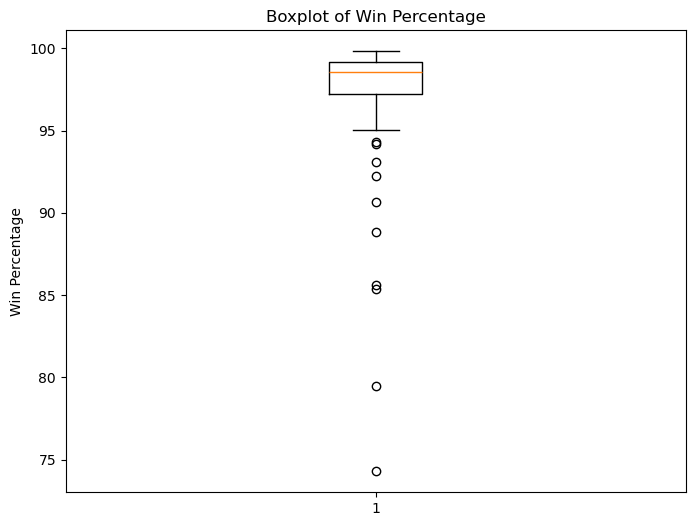

In [31]:
plt.figure(figsize=(8, 6))
plt.boxplot(win_percentage)
plt.title('Boxplot of Win Percentage')
plt.ylabel('Win Percentage')
plt.show()

Il boxplot conferma le nostre ipotesi. Per fare delle osservazioni interessanti allora dobbiamo modificare le probabilità di margine con cui andiamo a categorizzare win_percentage. 

Per realizzare una rappresentazione OLAP utilizziamo i seguenti parametri :
- Tentativi (già quantizzata perché vanno da 1 a 6)
- Attività di un utente (tanti tweet -> molto attivo, pochi tweet -> poco attivo)
- La difficoltà (quantizzata tarando la media dei tentativi)
- 3 opzioni per la 3 variabile
    - Parole più o meno recenti (dal wordleID o data del tweet)
    - Orario del tweet (Morning, Afternoon, Evening, Night)
    - Client di provenienza (Android, iPhone, Web, Other) 

1.162164e+09     9
2.413416e+09    18
1.507218e+18     1
1.632524e+08    65
2.536923e+08     1
2.240635e+09     1
1.257020e+18    31
5.667576e+08     1
4.181482e+09     2
2.490291e+09     1
Name: UserID, dtype: int64
Mean:  4.929964048162175
Variance:  69.020591045669
Mode:  0    1
Name: UserID, dtype: int64
Median:  2.0


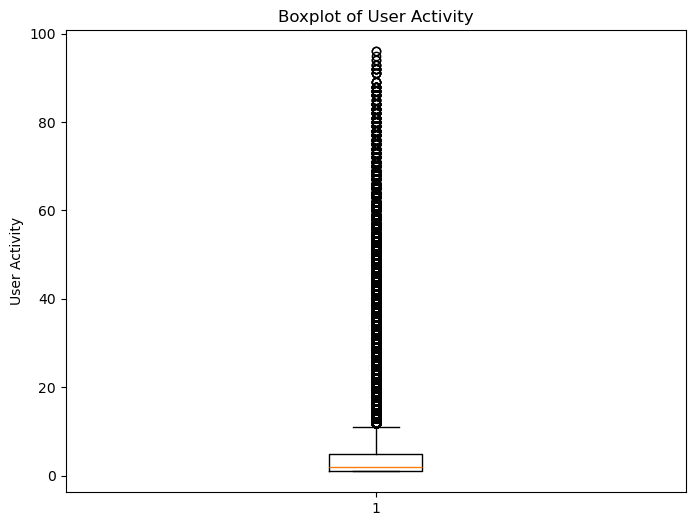

In [32]:
user_activity = wordle['UserID'].value_counts()
print(user_activity.sample(n=10))

print("Mean: ", user_activity.mean())
print("Variance: ", user_activity.var())
print("Mode: ", user_activity.mode())
print("Median: ", user_activity.median())

plt.figure(figsize=(8, 6))
plt.boxplot(user_activity)
plt.title('Boxplot of User Activity')
plt.ylabel('User Activity')
plt.show()

In [33]:
print(user_activity)

unique_wordle_ids = wordle['WordleID'].nunique()
print("Number of unique WordleIDs:", unique_wordle_ids)

5.185310e+08    96
2.778092e+09    96
7.569270e+17    95
1.424114e+18    94
1.963916e+08    94
                ..
1.052766e+18     1
1.327120e+18     1
7.967413e+17     1
1.075024e+09     1
7.109468e+17     1
Name: UserID, Length: 406377, dtype: int64
Number of unique WordleIDs: 107


In [34]:
user_macrocategories = pd.cut(user_activity, bins=[0, 3, 8, 50, 107], labels=['Low Activity', 
                                                                              'Medium Activity', 'High Activity', 'Very High Activity'])
wordle = wordle.merge(user_macrocategories.rename('UserActivity'), left_on='UserID', right_index=True)
wordle.head()

,WordleID,ID,Created_At,Source,UserID,Attempts,Match,Win,UserActivity
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Twitter for iPhone,36816757.0,3,"[🟨🟨⬛⬛⬛, 🟨⬛🟨⬛🟩, 🟩🟩🟩🟩🟩]",True,Low Activity
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Twitter for iPhone,482591014.0,4,"[⬛⬛⬛⬛🟩, ⬛⬛⬛⬛🟩, ⬛🟩⬛⬛🟩, 🟩🟩🟩🟩🟩]",True,High Activity
73387,257,1499477529232617480,2022-03-03 20:11:16+00:00,Twitter for iPhone,482591014.0,5,"[⬛🟨⬛⬛⬛, ⬛⬛🟩🟨⬛, ⬛🟨🟩⬛⬛, ⬛🟨🟩🟨⬛, 🟩🟩🟩🟩🟩]",True,High Activity
133607,260,1500563244653678592,2022-03-06 20:05:31+00:00,Twitter for iPhone,482591014.0,5,"[⬛⬛⬛⬛⬛, ⬛🟩⬛⬛⬛, ⬛🟩⬛⬛🟨, 🟩🟩🟩🟩⬛, 🟩🟩🟩🟩🟩]",True,High Activity
161136,262,1501340165331202049,2022-03-08 23:32:43+00:00,Twitter for iPhone,482591014.0,5,"[⬛⬛⬛⬛🟨, ⬛⬛⬛⬛🟨, ⬛⬛🟩🟨🟩, 🟩⬛🟩⬛🟩, 🟩🟩🟩🟩🟩]",True,High Activity


In [35]:
#pd.set_option('display.float_format', '{:.20f}'.format)
print(wordle['UserID'])

0          3.681676e+07
1          4.825910e+08
73387      4.825910e+08
133607     4.825910e+08
161136     4.825910e+08
               ...     
2140174    2.043651e+07
2140175    5.645506e+07
2140177    2.513069e+09
2140182    1.350027e+18
2140189    7.109468e+17
Name: UserID, Length: 2003424, dtype: float64


Definiamo un'altra quantizzazione in base al periodo della giornata in cui è stato fatto il tweet:
- Morning (5-12)
- Afternoon (12-19)
- Evening (19-24)
- Night (00-5)

In [36]:
wordle['Created_At'] = pd.to_datetime(wordle['Created_At'])
wordle['Hour'] = pd.to_datetime(wordle['Created_At']).dt.hour

bins = [0, 5, 12, 19, 24]
labels = ['Night','Morning','Afternoon','Evening']

wordle['TimeOfDay'] = pd.cut(wordle['Created_At'].dt.hour, bins=bins, labels=labels, right=False)

n = 20
wordle.sample(n).sort_values(by='TimeOfDay').head(n)

,WordleID,ID,Created_At,Source,UserID,Attempts,Match,Win,UserActivity,Hour,TimeOfDay
2119638,376,1542449668252397570,2022-06-30 10:07:12+00:00,Twitter Web App,1.351529e+18,6,"[⬜🟨⬜⬜⬜, ⬜⬜🟩⬜⬜, ⬜⬜🟩🟩🟩, ⬜⬜🟩🟩🟩, ⬜🟩🟩🟩🟩, ⬜🟩🟩🟩🟩]",False,High Activity,10,Morning
1938720,365,1538500226075529218,2022-06-19 12:33:32+00:00,Twitter for iPhone,2.348906e+09,2,"[⬜⬜🟩🟨🟨, 🟩🟩🟩🟩🟩]",True,High Activity,12,Afternoon
1430616,327,1524780485930405888,2022-05-12 15:56:11+00:00,Twitter for iPhone,2.195651e+07,4,"[⬛⬛⬛⬛⬛, 🟩⬛🟨⬛⬛, 🟩🟩🟩⬛⬛, 🟩🟩🟩🟩🟩]",True,High Activity,15,Afternoon
1968950,367,1539266338182545411,2022-06-21 15:17:47+00:00,Twitter Web App,7.729317e+17,6,"[⬛🟨⬛🟩🟨, 🟨⬛⬛⬛🟨, ⬛⬛🟩⬛⬛, ⬛🟩🟩🟩🟩, ⬛🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]",True,High Activity,15,Afternoon
2006670,369,1540010752542511105,2022-06-23 16:35:50+00:00,Twitter for Android,1.245869e+18,4,"[⬜⬜⬜⬜🟨, ⬜🟩🟩⬜🟩, ⬜🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]",True,Very High Activity,16,Afternoon
1167627,313,1519746028920053760,2022-04-28 18:31:03+00:00,Twitter for iPhone,4.238268e+08,4,"[⬛⬛⬛⬛🟨, 🟨⬛⬛⬛⬛, ⬛⬛🟩🟩🟨, 🟩🟩🟩🟩🟩]",True,High Activity,18,Afternoon
1965951,367,1539295648201203712,2022-06-21 17:14:15+00:00,Twitter for Android,1.707566e+08,4,"[⬛🟩🟨⬛⬛, ⬛🟨⬛⬛⬛, ⬛⬛🟨⬛🟩, 🟩🟩🟩🟩🟩]",True,High Activity,17,Afternoon
2034085,370,1540314661488193542,2022-06-24 12:43:27+00:00,Twitter for iPhone,2.906420e+09,2,"[🟩⬜🟩🟩🟩, 🟩🟩🟩🟩🟩]",True,Low Activity,12,Afternoon
1236018,316,1520783060148658178,2022-05-01 15:11:50+00:00,Twitter for iPhone,2.103068e+07,6,"[🟩🟨🟨⬛⬛, 🟩🟩🟩⬛⬛, 🟩🟩🟩⬛⬛, ⬛⬛⬛⬛⬛, ⬛⬛⬛⬛⬛, 🟩🟩🟩🟩🟩]",True,Low Activity,15,Afternoon
1414851,326,1524401247641812993,2022-05-11 14:49:14+00:00,Twitter for Android,8.333630e+08,3,"[⬜🟩⬜🟨⬜, ⬜🟩⬜⬜🟩, 🟩🟩🟩🟩🟩]",True,Medium Activity,14,Afternoon


Tracciamo un bar plot per vedere in quali fasce orarie gli utenti sono più attivi

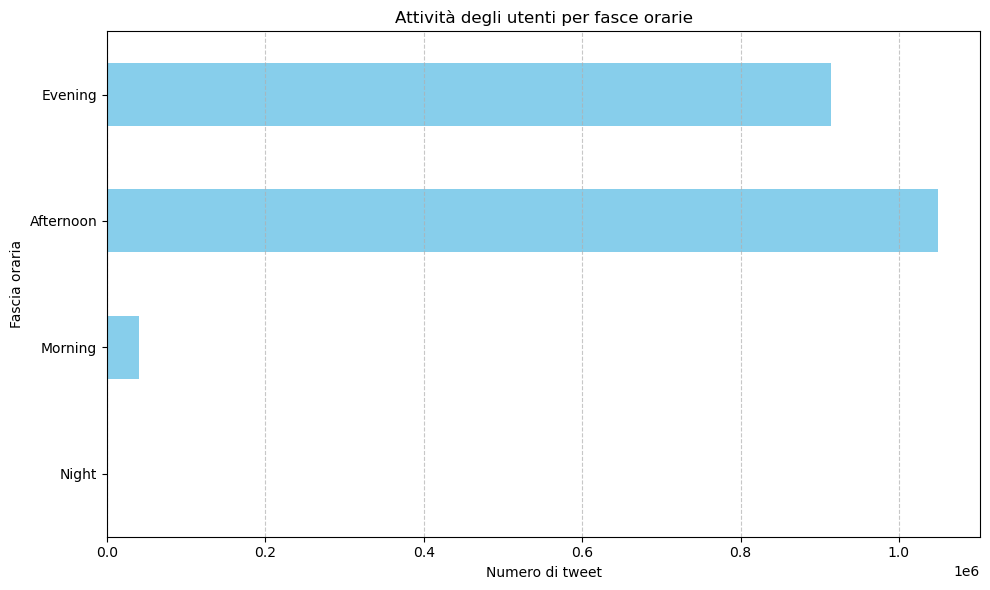

In [37]:
activity_by_time = wordle['TimeOfDay'].value_counts()

# Ordina i periodi della giornata in modo da mantenere l'ordine corretto sull'asse x
activity_by_time = activity_by_time.reindex(labels)

# Traccia l'istogramma
plt.figure(figsize=(10, 6))
activity_by_time.plot(kind='barh', color='skyblue')
plt.title('Attività degli utenti per fasce orarie')
plt.ylabel('Fascia oraria')
plt.xlabel('Numero di tweet')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Aggiungi una griglia sull'asse x
plt.tight_layout()  # Regola automaticamente i margini per evitare sovrapposizioni
plt.show()

Ci siamo informati riguardo all'orario di pubblicazione della parola del giorno, che dovrebbe essere a mezzanotte, nel nostro caso però nessun utente ha giocato nella fascia oraria notturna.
Possiamo affermare questa cosa dato che abbiamo fatto dei controlli anche applicando eventuali fusi orari

Come indicatore di difficoltà possiamo fare la seguente cosa:#
- calcolare una difficoltà che va da 1 a 3 in base al numero di tentativi effettuati (1,2),(3,4),(5,6)
- Nel caso in cui il numero di sconfitte superi la media delle sconfitte allora la parola viene etichettata come very hard

In [49]:
mean_attempts = wordle.groupby('WordleID')['Attempts'].mean()
print(mean_attempts)

# Calcola la media dei non vincitori
media_non_vincitori = (1 - wordle['Win'].mean()).round(3)
print("Media dei non vincitori:", media_non_vincitori)

# Definisci gli intervalli di difficoltà, inclusi "Very Hard"

# Calcola la media dei non vincitori per ciascun Wordle ID
media_locale_non_vincitori = (1 - wordle.groupby('WordleID')['Win'].mean()).round(3)

# Define the intervals for each macrocategory
easy_interval = (1, 4)
medium_interval = (4, 4.5)
hard_interval = (4.5, 6)

# Categorize the mean attempts into macrocategories
def categorize_attempts(mean_attempt, media_locale):
    if media_locale > media_generale_non_vincitori:
        return 'Very Hard' 
    elif easy_interval[0] <= mean_attempt <= easy_interval[1]:
        return 'Easy'
    elif medium_interval[0] <= mean_attempt <= medium_interval[1]:
        return 'Medium'
    elif hard_interval[0] <= mean_attempt <= hard_interval[1]:
        return 'Hard'
    else:
        return 'Undefined'

# Create a new column with macrocategories in the original DataFrame
wordle['Difficulty'] = wordle['WordleID'].map(mean_attempts.apply(categorize_attempts, media_locale_non_vincitori))

wordle.sample(n=20).head(20)


WordleID
254    3.763869
255    4.338605
256    3.961160
257    3.871117
258    4.223167
         ...   
371    4.222555
372    3.653250
374    4.470488
376    4.624713
399    4.257679
Name: Attempts, Length: 107, dtype: float64
Media dei non vincitori: 0.026


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().